# MA943 - Numerical Methods

* <font color=blue> Well done. Comments and marks are in blue text throughout.</font>
* <font color=blue> Each question is worth 15 marks and there are 10 marks for clarity and presentation.</font>
* <font color=blue> I gave you 7/10 for clarity and presentation.</font>

<font color=blue>
Overall mark: 15 + 11 + 13 + 15 +15 + 12 + 7 = 88/100
</font>

In [12]:
15 + 11 + 13 + 15 +15 + 12 + 7

88

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [1]:
using PyPlot
include("functions.jl")

plot_true (generic function with 1 method)

#### Question 1.1

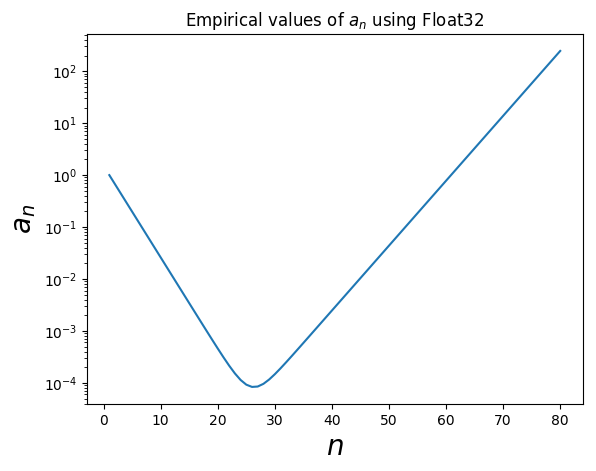

PyObject <matplotlib.text.Text object at 0x120006650>

In [2]:
# Recursion with Float32

# Initialiasation zeros array
a32 = zeros(Float32, 80)
# Set initial conditions
a32[1] = Float32(1)
a32[2] = Float32(2)/Float32(3)

# Calculate sequence
for i in 3:80
    a32[i] = recursion32(a32[i-1], a32[i-2])
end

# Plot results
plt[:plot](1:80, a32)
plt[:yscale]("log")
plt[:xlabel](L"$n$", fontsize=20)
plt[:ylabel](L"$a_n$", fontsize=20)
plt[:title](L"Empirical values of $a_n$ using Float32")

#### Question 1.2

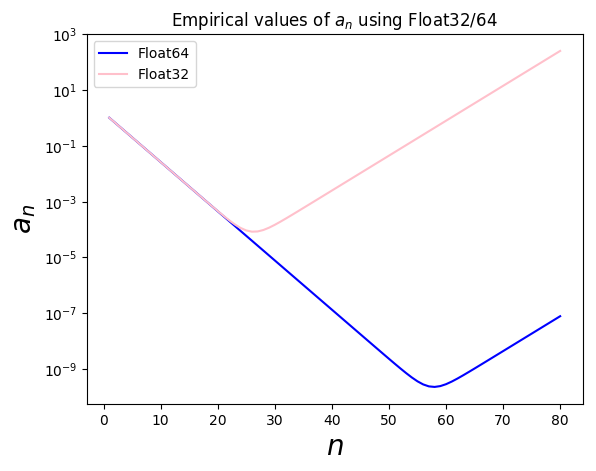

PyObject <matplotlib.text.Text object at 0x128c4a5d0>

In [3]:
# Recursion with Float64

# Initialise array
a64 = zeros(Float64, 80)

# Set initial conditions
a64[1] = Float64(1)
a64[2] = Float64(2)/Float64(3)

# Calculate sequence
for i in 3:80
    a64[i] = recursion64(a64[i-1], a64[i-2])
end

# Plot
plt[:title]("Float64")
# plot_true()
plt[:plot](1:80, a64, label="Float64", color="blue")
plt[:plot](1:80, a32, label="Float32", color="pink")
plt[:yscale]("log")
plt[:legend]()

plt[:xlabel](L"$n$", fontsize=20)
plt[:ylabel](L"$a_n$", fontsize=20)
plt[:title](L"Empirical values of $a_n$ using Float32/64")

#### Question 1.3
Given:
$$ a_{n+1} = 2a_n - \frac{8}{9}a{n-1} $$
First use the ansatz $a_n = \lambda^2$ 
$$ \lambda^{n+1} = 2\lambda^n - \frac{8}{9} \lambda^{n-1} $$
$$ \implies \lambda^{2} = 2\lambda - \frac{8}{9} $$
Second order polynomial which we solve to find
$$ \lambda_{1,2} = \frac{2 \pm \sqrt{4-\frac{32}{9}}}{2} = 1 \pm \frac{1}{3} $$
Leading to the general solution
$$ a_{n+1} = c_1(\frac{4}{3})^{n} + c_2(\frac{2}{3})^{n} $$

#### Question 1.4
Solving the system of equation
$$ a_1 = c_1+c_2 $$
$$ a_2 = c_1\frac{4}{3}+\frac{2}{3}c_2$$
we find $c_1 = 0$, $c_2=1$, and the solution is therefore
$$ a_{n+1} = (\frac{2}{3})^{n} $$

#### Question 1.5
In the perturbed case, the system of equation is
$$ 1 = c_1+c_2 $$
$$ \frac{2}{3}+\epsilon = c_1\frac{4}{3}+\frac{2}{3}c_2$$
The solutions are then $c_1 = \frac{3}{2}\epsilon$, $c_2 = 1-\frac{3}{2}\epsilon$. Importantly, the $c_1$ term is not zero anymore, which means there is a contribution of $(\frac{4}{3})^n$. The latter contribution will initially be minimal (given $\epsilon <<1$), but since it is a power sequence, it will increase quickly and will at some point become the main out of the two terms.

The reason why this is connected to the error that can be seen from the graph is that float32 has a precision limit, and past that precision, it can have very unexpected behaviour (we saw that in class with the substraction example). This "randomness" can be compared to the $\epsilon$ perturbation, and therefore we see the sequence starting to increase again at around the $58^{th}$ iteration.


#### Question 1.6

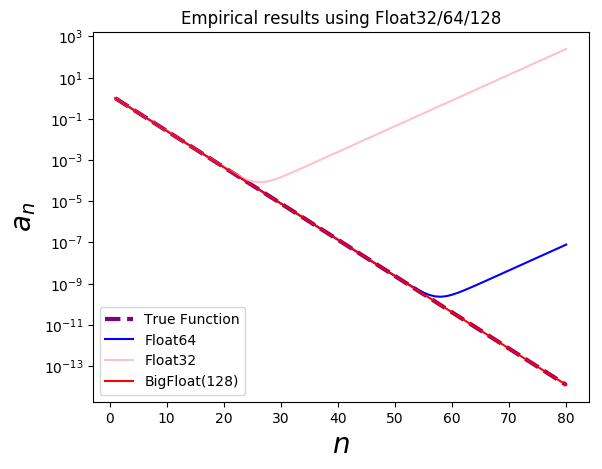

PyObject <matplotlib.text.Text object at 0x128df8390>

In [11]:
# Recursion for BigFloat

# Set precision
setprecision(128)

# Initialise and set initial conditions
aB = zeros(BigFloat, 80)

# Set initial conditions
aB[1] = BigFloat(1)
aB[2] = BigFloat(2)/BigFloat(3)

# Calculate recursion
for i in 3:80
    aB[i] = BigFloat(recursionBig(aB[i-1], aB[i-2]))
end

# Plot all results together
plot_true()
plt[:plot](1:80, a64, label="Float64", color="blue")
plt[:plot](1:80, a32, label="Float32", color="pink")
plt[:plot](1:80, Array{Float64}(aB), label="BigFloat(128)", color="red")
plt[:yscale]("log")
plt[:legend]()

plt[:xlabel](L"$n$", fontsize=20)
plt[:ylabel](L"$a_n$", fontsize=20)
plt[:title]("Empirical results using Float32/64/128")


<font color=blue>
Q1: Good answer. 15/15
</font>

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [5]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

## 1

In [6]:
# Verify works as expected
A = zeros(Int64, 5)
B = zeros(Int64, 5)

A = [1,3,7,8,9]
B = [2,3,4,9,10]

@show mergepresorted(A,B)
print("It's sorted!")

mergepresorted(A, B) = [1, 2, 3, 3, 4, 7, 8, 9, 9, 10]
It's sorted!

## 2

In [7]:
function mergeSort(A)
    n = length(A)
    if n==1
        return A
    else
        m = Int(n/2)
        return mergepresorted( mergeSort(A[1:m]), mergeSort(A[m+1:end]) )
    end
end

mergeSort (generic function with 1 method)

In [8]:
mergeSort([3,7,1,23,5,4,88,43])
print("It's sorted!!")

It's sorted!!

## 3

The recurrence can be separated into two terms:

The "mergepresorted", from which the recurrence F(n/2) comes from, because the function is given a n/2 long array (where n is the length at that point, not the initial length n) 

The "mergesort" gives the $n$ term, since it is the "cost" of reassembling an n-long array

<font color=blue>
It's the other way around. The two calls to mergesort() give the 2 F(n/2) term and a single call of mergepresorted on two arrays of lenght n/2 gives the n term.
</font>

The initial condition comes from the fact that a 1-array is already sorted by definition

## 4

> $$F(n) = 2\, F(\frac{n}{2}) + n $$

> $$\rightarrow \ F(2^p) = 2\, F(\frac{2^p}{2}) + 2^p $$
> $$\rightarrow \ F(2^p) = 2\, F(2^{p-1}) + n $$

> $$\rightarrow \ b_p = 2\, b_{p-1} + 2^p $$

> Initial condition: $b_0 = F(1) = 1$

## 5

> Find solution to 
> $$ b_p = 2\, b_{p-1} $$
> $$ \rightarrow \lambda^p = 2 \lambda^{p-1} $$
> $$ \rightarrow \lambda = 2 $$


<font color=blue>
General solution should contain a single arbitrary constant since this is a first order recursion relation.
</font>

## 6 

> Find particular solution
> $$  b_p = 2\, b_{p-1} + 2^p $$
> Guessed ansatz: $b_p = Ap2^p$, extra p because otherwise there's multiplicity with the $2^p$ term
> Then 

> $$ Ap2^p = 2A(p-1)2^{p-1} + 2^p $$
> $$ \rightarrow 2^p( Ap - A(p-1) -1 ) = 0 $$

> Given $ 2^p = 0 $ impossible, therefore only solution coming from the bracketed equation, which is $A=1$
> Therefore, the final solution is 

> $$ b_p = c2^p(1+p) $$


<font color=blue>
The constant appears from nowhere here - it should have come from the general solution of the homogeneous equation above.
</font>

> Adding initial condition, we find $c=1$
> $$ b_p = 2^p(1+p) $$
> Convert back using $n=2^p$, $p=\frac{\log(n)}{2}$
> Leading to 
> $$ F(n) = n(1+\frac{\log(n)}{2}) $$

## 7

> $$ F(n) = n(1+\frac{\log(n)}{2}) \xrightarrow{n \text{ large}} n\log(n)  $$

## 8

In [9]:
N=15

# Compilation step, ignore this
@timed mergeSort([1,2,3,4])

times = []
for i in 1:N
    l = 2^i
    A = rand(1:l, l) 

    temp = @timed mergeSort(A)
    push!(times, temp[2])
end

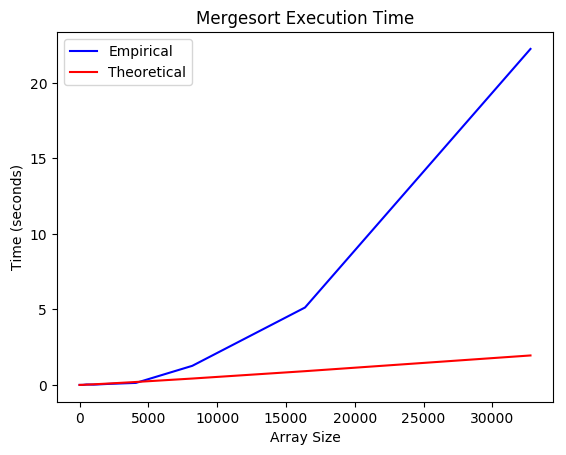

PyObject <matplotlib.legend.Legend object at 0x125860e10>

In [10]:
x = 2.^(1:N)
y = x.*(log.(x))*times[1]
plt[:xlabel]("Array Size")
plt[:ylabel]("Time (seconds)")
plt[:title]("Mergesort Execution Time")
plt[:plot](x, times, color="blue", label="Empirical")
plt[:plot](x, y, color="red", label="Theoretical")
plt[:legend]()
<font color=blue>
Q1: Good answer. 15/15
</font>

<font color=blue>
It would be better to put log-log axes here since your x values are increasing in powers of 2.
</font>

<font color=blue>
Q2: 11/15
</font>